# Install and Import Dependencies

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt


In [ ]:
!pip list

In [6]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np



# Load Model 

In [7]:
model=torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\hp/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-2 Python-3.9.2 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [8]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Make Detections trained on coco classes


In [4]:
#img='https://ultralytics.com/images/zidane.jpg'
img='https://cdn.vanguardngr.com/wp-content/uploads/2022/04/Traffic-jams-and-Human-transportion-in-Lagos-Nigeria.jpg'

In [5]:
result=model(img)
result.print()

image 1/1: 432x768 9 persons, 13 cars, 3 buss, 1 truck
Speed: 1339.7ms pre-process, 685.4ms inference, 19.9ms NMS per image at shape (1, 3, 384, 640)


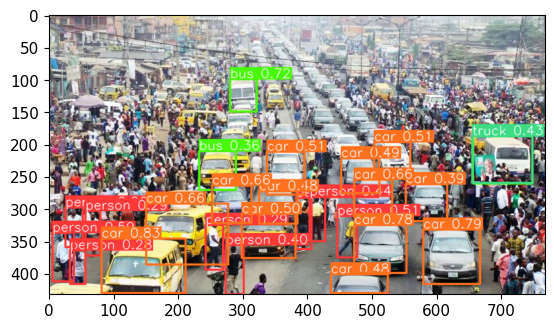

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()


# Real-Time Detection

In [11]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    result=model(frame)
    cv2.imshow("Ultralytics",np.squeeze(result.render()))
    if cv2.waitKey(10) & 0xff==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Customized Model from Scratch

In [9]:
import uuid #For the Creation of Unique Identifier
import os #To leverage and label file path
import time #To take a break from the images being collected

In [7]:
IMAGE_PATH=os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20


In [8]:
os.path.join(IMAGE_PATH,labels[0]+'.'+str(uuid.uuid1())+'.jpg')

'data\\images\\awake.7f44c41a-a36e-11ed-96b3-001e101f98fb.jpg'

In [16]:
cap=cv2.VideoCapture(0)
for label in labels:
    print('collecting image for {}'.format(label))
    time.sleep(10)
    for number_img in range(number_imgs):
        print('collecting image {},{}'.format(label,number_img))
        ret,frame=cap.read()
        
        img_name=os.path.join(IMAGE_PATH,label +'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(img_name,frame)
        cv2.imshow("Image Collection",frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xff==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
            
        

collecting image for awake
collecting image awake,0
collecting image awake,1
collecting image awake,2
collecting image awake,3
collecting image awake,4
collecting image awake,5
collecting image awake,6
collecting image awake,7
collecting image awake,8
collecting image awake,9
collecting image awake,10
collecting image awake,11
collecting image awake,12
collecting image awake,13
collecting image awake,14
collecting image awake,15
collecting image awake,16
collecting image awake,17
collecting image awake,18
collecting image awake,19
collecting image for drowsy
collecting image drowsy,0


In [17]:
!git clone https://github.com/heartexlabs/labelImg

Cloning into 'labelImg'...
Updating files:  41% (49/117)
Updating files:  42% (50/117)
Updating files:  43% (51/117)
Updating files:  44% (52/117)
Updating files:  45% (53/117)
Updating files:  46% (54/117)
Updating files:  47% (55/117)
Updating files:  48% (57/117)
Updating files:  49% (58/117)
Updating files:  50% (59/117)
Updating files:  51% (60/117)
Updating files:  52% (61/117)
Updating files:  53% (63/117)
Updating files:  54% (64/117)
Updating files:  55% (65/117)
Updating files:  56% (66/117)
Updating files:  57% (67/117)
Updating files:  58% (68/117)
Updating files:  59% (70/117)
Updating files:  60% (71/117)
Updating files:  61% (72/117)
Updating files:  62% (73/117)
Updating files:  63% (74/117)
Updating files:  64% (75/117)
Updating files:  65% (77/117)
Updating files:  66% (78/117)
Updating files:  67% (79/117)
Updating files:  68% (80/117)
Updating files:  69% (81/117)
Updating files:  70% (82/117)
Updating files:  71% (84/117)
Updating files:  72% (85/117)
Updating file

# Labelling Images

In [23]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Train Model 

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# Load Custom Model

In [30]:
model=torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp5/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\hp/.cache\torch\hub\master.zip
YOLOv5  2023-2-2 Python-3.9.2 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [43]:
img=os.path.join('data','images','awake.c31294d9-a300-11ed-81c0-001e101f98fb.jpg')

In [44]:
result=model(img)
result.print()

image 1/1: 480x640 (no detections)
Speed: 11.0ms pre-process, 682.2ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)


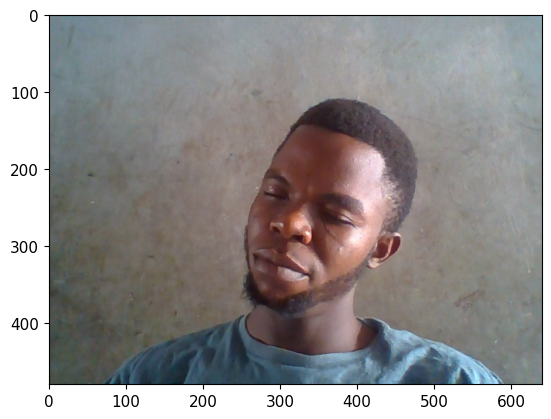

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()